# Soccer Team Optimization Problem

### The problem: 
#### The manager of a soccer team wants to optimze the selection of his/her players of  team based on the historical preformance of them and the volatility of their performace.
To solve this problem we define tha variable $X_{i}$ as the value of player $i$ to be 1 for selected 0 for not selected, then we define the return or performance of the players by the vector $\mu$, the performance of the team as $\mu X$, the performance of the team is going to be affected by the variance of team's performance, therefore we can write the following hamiltonian:
$H_{s} = -\mu X + \frac{\gamma}{2} X^{T} \Sigma X$. To find the optimal players we maximize the performance of the team suject taking into account the volatility of the performance and impose an equality constraint that limits the the maximum invested in the team by a lvel K, so we solve:
$ min [ -\mu X + \frac{\gamma}{2} X^{T} \Sigma X + \lambda (2 wX-K) ]$
Where $\Sigma$ is the covarince matrix, $w$ some weights, $\lambda$ is a Lagrange multiplier, $\gamma$ a risk aversion parameter.

In [1]:
import pandas as pd
import sys
#from dwave.system import LeapHybridSampler
from math import log2, floor
import dimod
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
token = 'KmJQ-141b8b4cd89a36308086e68ef7c38dc486158424'

In [54]:
N = 11  # number of players
returns = [1, 2, 3, 4, 8, 9, 10,5,5,6,7] # current returns 
N_returns = [i/10 for i in Hreturns] # Normalized returns
weights = [20, 20, 30, 30,50,60,110,22,24,30,35] # value of each players in millions of dollars

#### Current returns defined in N_returns, normally they are estimated using any forecasting time series stochastic model, here we assume they are given.

In [55]:
N_returns

[0.1, 0.2, 0.3, 0.4, 0.8, 0.9, 1.0, 0.5, 0.5, 0.6, 0.7]

####  Historical rating for each player of the past 35 matches, scores go from 1 to 10

In [56]:

import numpy as np
array = np.random.randint(1,10, size=(35, 11))
print(array)


[[6 3 5 1 7 7 6 3 3 2 3]
 [5 7 1 4 4 3 9 4 6 1 8]
 [6 9 2 3 6 9 6 5 9 4 9]
 [2 8 6 5 6 5 9 6 2 4 4]
 [5 1 5 6 8 8 9 8 3 6 5]
 [1 7 2 4 2 2 6 2 8 8 6]
 [2 6 6 3 4 4 5 7 3 8 7]
 [3 1 7 8 9 1 6 6 6 8 7]
 [6 1 2 6 9 2 3 5 8 7 4]
 [7 5 3 8 8 9 7 3 1 9 2]
 [3 8 9 2 5 2 6 1 7 4 3]
 [5 1 4 3 9 6 9 8 4 2 1]
 [1 4 3 2 5 8 6 1 7 8 5]
 [3 4 4 7 1 9 8 3 3 5 6]
 [7 8 7 4 2 9 5 1 8 3 3]
 [2 8 6 3 6 4 2 2 8 8 9]
 [5 1 9 9 2 7 2 2 4 7 9]
 [7 5 5 6 1 2 7 4 1 6 3]
 [4 2 3 3 8 8 7 1 7 5 2]
 [5 8 4 6 2 2 7 6 4 3 2]
 [9 7 7 1 6 9 2 7 1 1 5]
 [7 2 1 4 8 2 1 6 5 6 2]
 [9 2 1 7 1 9 7 5 1 9 1]
 [5 8 7 8 4 3 9 7 3 6 2]
 [8 7 9 8 7 3 3 9 6 1 9]
 [8 9 5 5 2 2 2 9 2 1 1]
 [1 9 5 1 2 1 6 8 6 6 2]
 [7 1 1 5 3 9 5 4 2 6 5]
 [2 6 7 9 7 9 5 6 5 4 8]
 [9 6 7 3 3 4 2 4 3 4 9]
 [7 2 3 9 7 5 9 6 5 8 9]
 [6 4 7 8 2 2 3 9 1 9 9]
 [4 2 9 6 7 1 5 1 3 5 2]
 [8 2 9 6 5 4 3 1 2 2 3]
 [7 4 5 3 7 3 4 4 6 8 8]]


####  Covariance matrix capturing the variance of the performance calculated from historical data

In [57]:

df = pd.DataFrame(array,
                  columns=['player-1', 'player-2', 'player-3', 'player-4', 'player-5', 'player-6','player-7','player-8','player-9','player-10','player-11'])
#df['log return'] = np.log(df['1']) - np.log(df['1'].iloc[0])
Returns = np.log(df) - np.log(df.iloc[0])
#print(Returns)
Cov = Returns.cov()
print(Cov)

           player-1  player-2  player-3  player-4  player-5  player-6  \
player-1   0.415555 -0.119348 -0.035345  0.100140  0.006170  0.084353   
player-2  -0.119348  0.619116  0.112536 -0.142792 -0.144549 -0.054438   
player-3  -0.035345  0.112536  0.460122 -0.001309  0.034960 -0.085651   
player-4   0.100140 -0.142792 -0.001309  0.389867 -0.053638 -0.016111   
player-5   0.006170 -0.144549  0.034960 -0.053638  0.465554  0.019138   
player-6   0.084353 -0.054438 -0.085651 -0.016111  0.019138  0.515582   
player-7  -0.098942  0.001316 -0.049787  0.034188 -0.017727  0.067120   
player-8   0.091103  0.027744 -0.053549  0.065817  0.003337 -0.070217   
player-9  -0.188413  0.029904 -0.028991 -0.078836  0.158138 -0.076017   
player-10 -0.150451 -0.153940 -0.072124  0.108360 -0.041036 -0.028544   
player-11 -0.066367  0.044675  0.073622  0.045257  0.059391  0.056570   

           player-7  player-8  player-9  player-10  player-11  
player-1  -0.098942  0.091103 -0.188413  -0.150451  -0.0663

## Forming the QUBO matrix Q
 $X^{T}Q X$
 The original hamiltonian above can be writen in quadratic form to form a QUBO matrix Q


In [58]:
gamma = 0.2 # Assuming a fixed risk aversion factor = 0.2
A = np.array(N_returns) # returns will affect the diagonal of the QUBO
D = np.diag(A)
Q = -D+ 0.5*gamma*Cov

#### Defining the variables

In [59]:
# defining the variables
variables = list(range(N))
labels = [1, 2, 3, 4,5,6,7,8,9,10,11]
from dimod import BinaryQuadraticModel

bqm = BinaryQuadraticModel('BINARY')

variables = [bqm.add_variable(f'x_{v}', -labels[v]) for v in variables]
variables

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10']

### The bqm for Q

In [45]:
#bqm = dimod.BinaryQuadraticModel.from_numpy_matrix(Cov)
bqm = dimod.BinaryQuadraticModel.from_numpy_matrix(Q)

C:\Users\Jose-Henry\Anaconda3\envs\py36class\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: BQM.from_numpy_matrix(M) is deprecated since dimod 0.10.0, use BQM(M, "BINARY") instead.
  


In [60]:
# Constant for an equality constraint
K = sum([20, 20, 30, 30,50,60,110,22,24,30,35])
K

431

### Equality constraint

In [62]:
## Binary Equality constraint
bqm.add_linear_equality_constraint(
    [(variables[i], 2*weights[i]) for i in range(N)],
    constant=-K,
    lagrange_multiplier=10
)

### Optimizing using DWave Hybrid simulator

In [63]:
from dwave.system import LeapHybridSampler
 
sampler = LeapHybridSampler(token = "KmJQ-eb7dea9880650063660800305a6750d9fe70bb21")
response = sampler.sample(
    bqm, time_limit=25,
    )
best_solution = response.first.sample

indices = []
'''
for i, v in best_solution.items():
    if not str(i).startswith('s'):
        if v != 0:
            indices.append(i)
'''

"\nfor i, v in best_solution.items():\n    if not str(i).startswith('s'):\n        if v != 0:\n            indices.append(i)\n"

### From all the possible solutions the manager optimal option would be to select the player with value =1

In [69]:
best_solution

{'x_0': 0,
 'x_1': 1,
 'x_10': 0,
 'x_2': 1,
 'x_3': 1,
 'x_4': 0,
 'x_5': 1,
 'x_6': 0,
 'x_7': 1,
 'x_8': 1,
 'x_9': 1}

In [70]:
best_solution['x_10']

0

In [74]:
playersON = []
for i in best_solution:
    #print(best_solution[i])
    playersON.append(best_solution[i])

playersON    

[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]

### result = [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]

### Players selected as the optimal to play in the next game are shown below

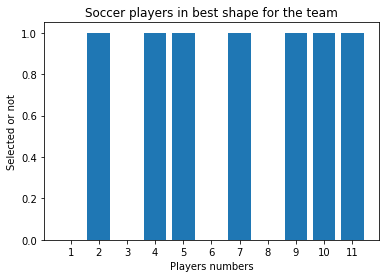

In [86]:
# Simple Bar Plot
import matplotlib.pyplot as plt
ls = [1,2,3,4,5,6,7,8,9,10,11]
plt.bar(ls,playersON)
plt.xlabel('Players numbers')
plt.ylabel("Selected or not")
plt.title('Soccer players in best shape for the team')
plt.xticks(ls)
plt.show()

### Verifying result with the exact solver
Effectively we see that our solution has the lowest energy = -32

In [89]:
from dimod import ExactSolver

solver = ExactSolver()
response = solver.sample(bqm)
print(response.truncate(10))

  x_0 x_1 x_10 x_2 x_3 x_4 x_5 x_6 x_7 x_8 x_9 energy num_oc.
0   0   0    0   0   1   1   1   0   1   1   1  -32.0       1
1   0   1    0   1   1   0   1   0   1   1   1  -32.0       1
2   1   0    0   1   1   0   1   0   1   1   1  -31.0       1
3   0   0    0   1   0   1   1   0   1   1   1  -31.0       1
4   0   0    0   0   1   0   0   1   1   1   1  -28.0       1
5   0   0    0   1   0   0   0   1   1   1   1  -27.0       1
6   1   1    1   1   1   1   0   0   0   0   1  -26.0       1
7   1   1    1   0   0   1   1   0   0   0   1  -25.0       1
8   0   0    0   1   1   1   1   0   1   1   0  -25.0       1
9   0   0    0   1   1   0   0   1   1   1   0  -21.0       1
['BINARY', 10 rows, 10 samples, 11 variables]


### Verifying result with the DWaveSampler solver, 
Initially the solver complains because the problem is not directly compatible with the chimera geometry....but then later using the Embedding Composite also one gets the right result.


In [91]:
from dwave.system import DWaveSampler

sampler = DWaveSampler(solver=dict(topology__type='chimera'), token = token)

response = sampler.sample(
    bqm, num_reads=10,
    annealing_time=10,
    auto_scale=False,
    answer_mode='raw'
    )
print(response)

BinaryQuadraticModelStructureError: Problem graph incompatible with solver.

### Using the EmbeddingComposite
#### using 1000 number of reads and 200 as annealing time
#### We get again the right result with energy = -32.0

In [97]:
from dwave.system import EmbeddingComposite
from dwave.system import DWaveSampler

sampler = EmbeddingComposite(DWaveSampler(solver=dict(topology__type='chimera'), token = token))

response = sampler.sample(
    bqm, num_reads=1000,
    annealing_time=200,
    auto_scale=True,
    answer_mode='raw',
    return_embedding=True
    )
print(response)

    x_0 x_1 x_10 x_2 x_3 x_4 x_5 x_6 x_7 x_8 x_9   energy num_oc. chain_b.
281   0   1    0   1   1   0   1   0   1   1   1    -32.0       1      0.0
306   0   0    0   0   1   0   0   1   1   1   1    -28.0       1      0.0
348   0   0    0   1   0   0   0   1   1   1   1    -27.0       1      0.0
844   0   0    0   1   1   0   0   1   1   1   0    -21.0       1      0.0
642   0   1    1   0   0   1   1   0   1   0   1     48.0       1      0.0
977   0   1    1   0   0   0   0   1   1   0   1     52.0       1      0.0
237   0   1    0   0   1   0   0   1   1   0   1    459.0       1      0.0
730   0   1    0   1   0   0   0   1   1   0   1    460.0       1      0.0
863   0   0    0   0   0   1   0   1   1   0   1    460.0       1      0.0
148   1   0    1   0   1   1   0   0   1   1   1    762.0       1      0.0
301   1   1    1   0   0   0   1   0   1   1   1    763.0       1 0.090909
858   1   1    1   0   0   0   1   0   1   1   1    763.0       1 0.090909
946   1   1    1   0   0 